# Climate Data Store | Copernicus 

Site: https://cds.climate.copernicus.eu/cdsapp#!/home

<img src="https://cds.climate.copernicus.eu/sites/default/files/inline-images/c3s-logo%20%281%29.png" style="float: left;"/>


## Step 1

Create an account in the Climate Data Store site

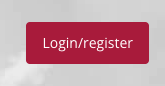

## Step 2
Install your cds api key. 
1. Login and Click here: https://cds.climate.copernicus.eu/api-how-to 
2. Copy your url and key like in the image 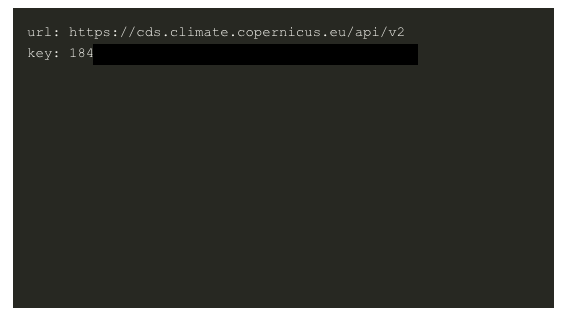
3. In your home directory create an empty file named ".cdsapirc" (on windows usually: C:\Users\username)
4. Open the .cdsapirc file in the text editor and paste your cds api key from step 2.
5. Save and close the .cdsapirc file

## Step 3
Install the CDS API CLIENT by running 
```$ pip install cdsapi```

In [ ]:
! pip install cdsapi

## Test your CDS API KEY
Run the following code to retrieve some data from the Climate Data Store

In [1]:
import cdsapi
c = cdsapi.Client()
c.retrieve("reanalysis-era5-pressure-levels",
{
"variable": "temperature",
"pressure_level": "1000",
"product_type": "reanalysis",
"year": "2008",
"month": "01",
"day": "01",
"time": "12:00",
"format": "netcdf"
}, "download.nc")

2023-12-18 16:07:25,133 INFO Welcome to the CDS
2023-12-18 16:07:25,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-12-18 16:07:25,373 INFO Request is completed
2023-12-18 16:07:25,374 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/adaptor.mars.internal-1702350761.8517907-20123-9-1800b70f-8b03-4330-994f-52dbf2e66eae.nc to download.nc (2M)
2023-12-18 16:07:25,975 INFO Download rate 3.3M/s                           


Result(content_length=2086236,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/adaptor.mars.internal-1702350761.8517907-20123-9-1800b70f-8b03-4330-994f-52dbf2e66eae.nc)

# ESGF GCMs
<img src="https://esgf-node.llnl.gov/site_media/logos/180712_WCRP-CMIP6_540x100px_72dpi.png" style="float: left;"/>

## Install esfg pyclient

In [6]:
!pip install zarr
!pip install pooch
pip install "click<8.0"
!pip install gcsfs

/Users/pedroherreralormendez/opt/anaconda3/bin/python
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.7 install --upgrade pip


If you find issues installing gcfs uncomment and run the following:

In [ ]:
# import sys
# print(sys.executable)
# !pip install zarr
# !pip install pooch
# pip install "click<8.0"
# !pip install gcsfs
# !{sys.executable} -m pip install gcsfs

Import the neccessary modules to access CMIP6 data:

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

Run this code to test the correct functionality of the installed modules

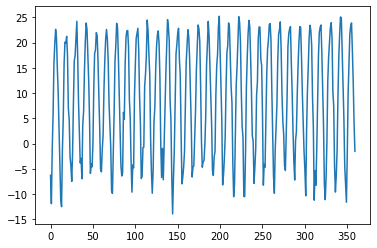

In [24]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_ta = df.query("table_id == 'Amon' & source_id == 'CanESM5' & variable_id == ['tas'] & experiment_id == ['historical','ssp585'] & member_id =='r1i1p1f1'")
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_ta.zstore.values[1]
# Create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# Open it using xarray and zarr
file1 = xr.open_zarr(mapper, consolidated=True)
# Select grid box nearest to the Toronto station latitude and longitude
tas_TO = file1.sel(lat="43.67", lon="280.6",method='nearest')

# Select time range using slicing
tas_TO_baseline = tas_TO.sel(time=slice("1981","2010")) - 273.15 # convert from Kelvin to degrees Celsius

# Load data. This step might take a minute or two.
tas_TO_baseline.load()
from matplotlib import pyplot as plt

# Plot time series of daily mean temperature
plt.plot(tas_TO_baseline['tas'],label='CanESM5')